In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv('/content/adult_dataset.csv')

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:

df_1 = (df['workclass']=='?').sum()

df_1

1836

In [7]:

df =df[df['workclass'] !='?']

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [8]:

df_categorical = df.select_dtypes(include=['object'])

df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [9]:

df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [12]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()



df_categorical = df_categorical.apply(le.fit_transform)

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [13]:

df =  df.drop(df_categorical.columns,axis=1)

df = pd.concat([df,df_categorical],axis=1)


df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [15]:

df['income'] = df['income'].astype('category')

In [16]:

from sklearn.model_selection import train_test_split

In [17]:

X = df.drop('income',axis=1)

y = df['income']

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [19]:

from sklearn.tree import DecisionTreeClassifier
dt_default =DecisionTreeClassifier(max_depth=5)

dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


y_pred_default =  dt_default.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_pred_default = dt_default.predict(X_test)

print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [21]:

print(confusion_matrix(y_test,y_pred_default))

print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


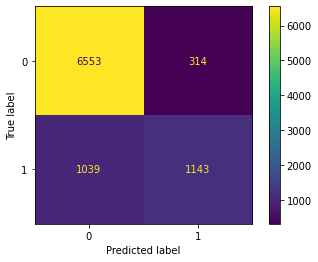

In [22]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_default,X_test, y_test)

<hr>

In [23]:

from sklearn import tree


features =list(df.columns[1:])


cls=list(df.columns[:])


In [24]:


print(features)

print(cls)

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


[Text(768.8352272727273, 498.3, 'X[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(396.3068181818182, 407.70000000000005, 'X[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(206.07954545454544, 317.1, 'X[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(126.81818181818181, 226.5, 'X[2] <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(63.40909090909091, 135.89999999999998, 'X[0] <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]'),
 Text(31.704545454545453, 45.299999999999955, 'gini = 0.08\nsamples = 311\nvalue = [298, 13]'),
 Text(95.11363636363636, 45.299999999999955, 'gini = 0.243\nsamples = 615\nvalue = [528, 87]'),
 Text(190.22727272727272, 135.89999999999998, 'X[4] <= 1846.0\ngini = 0.451\nsamples = 4934\nvalue = [3242, 1692]'),
 Text(158.52272727272725, 45.299999999999955, 'gini = 0.439\nsamples = 4729\nvalue = [3192, 1537]'),
 Text(221.9318181818182, 45.299999999999955, 'gini = 0.36

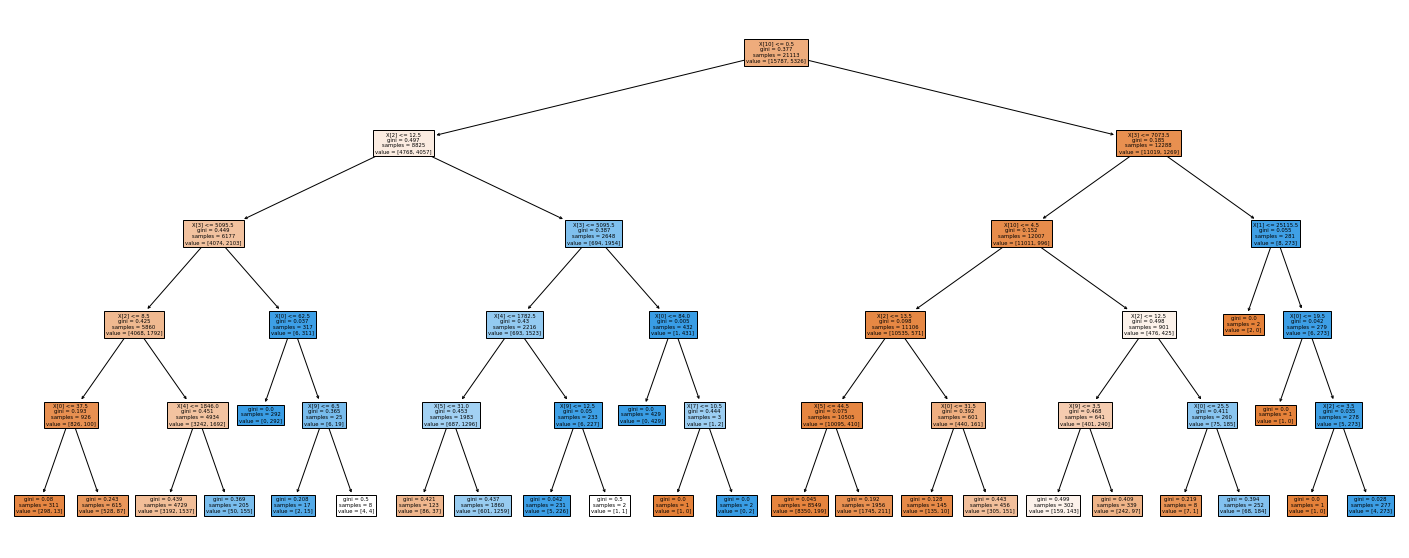

In [25]:

plt.figure(figsize=(25,10))
tree.plot_tree(dt_default,filled=True)



In [26]:

text_representation = (tree.export_text(dt_default))


text_representation 

'|--- feature_10 <= 0.50\n|   |--- feature_2 <= 12.50\n|   |   |--- feature_3 <= 5095.50\n|   |   |   |--- feature_2 <= 8.50\n|   |   |   |   |--- feature_0 <= 37.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  37.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |--- feature_2 >  8.50\n|   |   |   |   |--- feature_4 <= 1846.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_4 >  1846.00\n|   |   |   |   |   |--- class: 1\n|   |   |--- feature_3 >  5095.50\n|   |   |   |--- feature_0 <= 62.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  62.50\n|   |   |   |   |--- feature_9 <= 6.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_9 >  6.50\n|   |   |   |   |   |--- class: 0\n|   |--- feature_2 >  12.50\n|   |   |--- feature_3 <= 5095.50\n|   |   |   |--- feature_4 <= 1782.50\n|   |   |   |   |--- feature_5 <= 31.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_5 >  31.00\n|   |   |   |   |   

In [27]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds =5
parameters = {'max_depth': range(1, 40)}

dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100) 
                               

tree =  GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True) 
                   
                   

tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [28]:

scores =tree.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014887,0.003406,0.003938,0.000898,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,0.747750,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.018476,0.000494,0.003490,0.000298,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,0.822833,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.024385,0.001199,0.003398,0.000416,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,0.837518,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.030227,0.001496,0.003382,0.000222,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,0.842255,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.036328,0.001107,0.003332,0.000092,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,0.847466,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


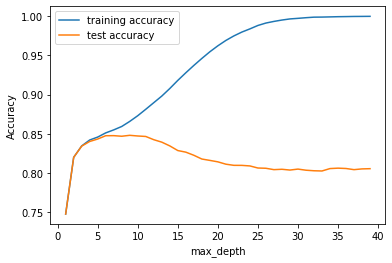

In [29]:

plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




In [30]:


n_folds =5

parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100) 
                               


tree =  GridSearchCV(dtree, parameters, cv=n_folds,   scoring="accuracy",return_train_score=True) 
                   
                 
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [31]:

scores =  tree.cv_results_


pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081596,0.001823,0.004738,0.001238,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,0.818806,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.067685,0.000971,0.003591,0.000066,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,0.849360,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.062502,0.002647,0.003606,0.000107,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,0.851729,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.061054,0.001783,0.003547,0.000132,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,0.838465,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.056459,0.001963,0.003415,0.000024,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,0.842018,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


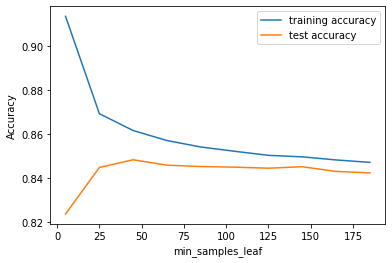

In [32]:

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()






In [33]:

n_folds =5

parameters ={'min_samples_split': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100) 
                              

tree =GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True) 
                   
                   

tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [34]:

scores = tree.cv_results_

 
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088738,0.002683,0.003924,0.000115,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,0.808385,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.084145,0.001029,0.004875,0.002150,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,0.827570,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.080827,0.002230,0.003752,0.000143,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,0.838702,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.081302,0.001939,0.004097,0.000819,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,0.843913,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.076677,0.001695,0.003580,0.000056,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,0.845334,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


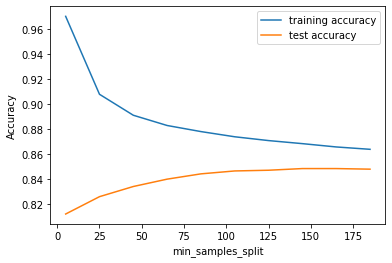

In [35]:

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()





In [36]:

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}


n_folds = 5

dtree =DecisionTreeClassifier()


grid_search =  GridSearchCV(estimator = dtree, param_grid = param_grid,cv = n_folds, verbose = 1) 
                          

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [37]:

cv_results = pd.DataFrame(grid_search.cv_results_)


cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043322,0.001146,0.003345,0.000153,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.042830,0.001278,0.003545,0.000221,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.042850,0.001266,0.003811,0.000937,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.044157,0.001999,0.003549,0.000328,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.068630,0.003871,0.003459,0.000051,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.070232,0.003341,0.003610,0.000148,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.066084,0.001618,0.003866,0.000276,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.065296,0.002546,0.003563,0.000205,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.036987,0.001568,0.003716,0.000783,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.036285,0.001800,0.003425,0.000168,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [38]:

print("best accuracy", grid_search.best_score_)

print(grid_search.best_estimator_)


best accuracy 0.8510400232064759
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [39]:

clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)


clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [40]:

clf_gini.score(X_test,y_test)

0.850922753895458

[Text(717.5383474576271, 518.8909090909091, 'X[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(410.3427966101695, 469.4727272727273, 'X[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(271.5521186440678, 420.05454545454546, 'X[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(191.75338983050847, 370.6363636363636, 'X[2] <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(54.85423728813559, 321.21818181818185, 'X[0] <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]'),
 Text(22.698305084745762, 271.8, 'X[5] <= 49.0\ngini = 0.08\nsamples = 311\nvalue = [298, 13]'),
 Text(15.132203389830508, 222.38181818181818, 'X[13] <= 34.5\ngini = 0.061\nsamples = 254\nvalue = [246, 8]'),
 Text(7.566101694915254, 172.96363636363634, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]'),
 Text(22.698305084745762, 172.96363636363634, 'X[1] <= 154366.0\ngini = 0.084\nsamples = 182\nvalue = [174, 8]'),
 Text(15.1322033898

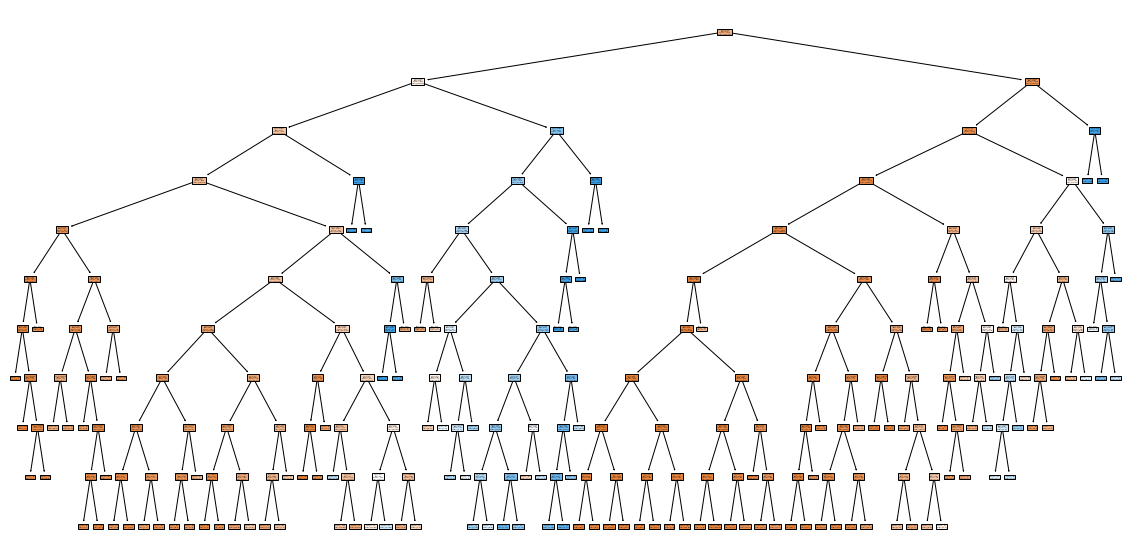

In [41]:

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini,filled=True)



In [42]:

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3,min_samples_leaf=50,min_samples_split=50)  
                                 
                                 
                                  
                                  

clf_gini.fit(X_train, y_train)


print(clf_gini.score(X_test,y_test))


0.8393192617968837


[Text(558.0, 475.65000000000003, 'X[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(279.0, 339.75, 'X[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(69.75, 67.94999999999999, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(209.25, 67.94999999999999, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]'),
 Text(348.75, 67.94999999999999, 'gini = 0.43\nsamples = 2216\nvalue = [693, 1523]'),
 Text(488.25, 67.94999999999999, 'gini = 0.005\nsamples = 432\nvalue = [1, 431]'),
 Text(837.0, 339.75, 'X[3] <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]'),
 Text(697.5, 203.85000000000002, 'X[10] <= 4.5\ngini = 0.152\nsamples = 12007\nvalue = [11011, 996]'),
 Text(627.75, 67.94999999999999, 'gini = 0.098\nsamples = 11106

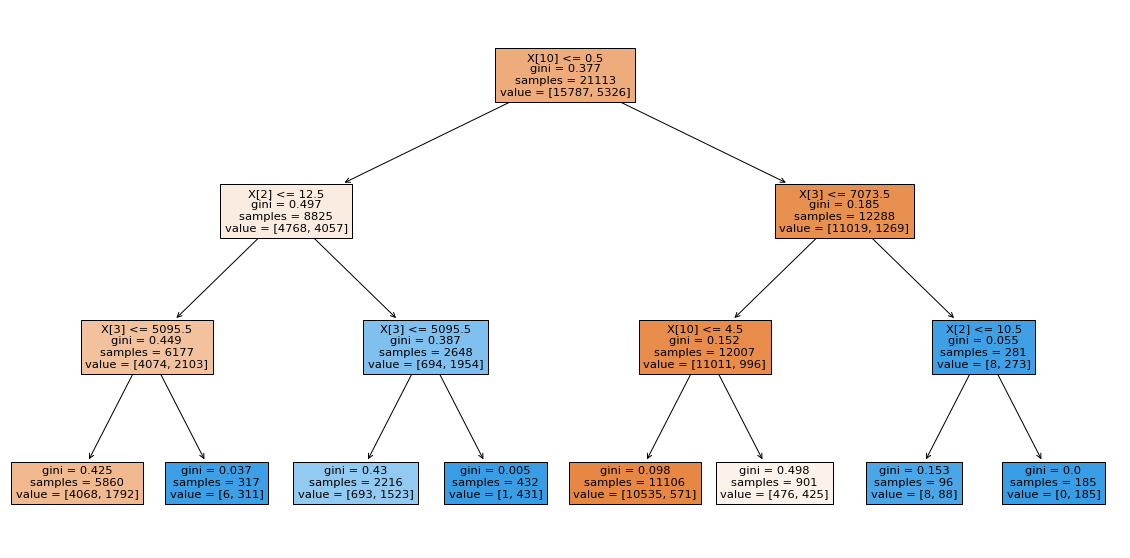

In [43]:

plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini,filled=True)








In [44]:

y_pred =  clf_gini.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



[[6564  303]
 [1151 1031]]


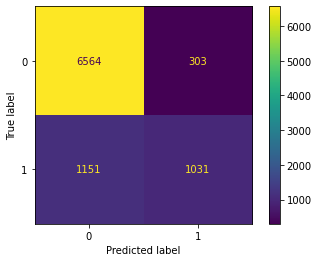

In [45]:

print(confusion_matrix(y_test,y_pred))


plot_confusion_matrix(clf_gini,X_test, y_test)